In [1]:
from IPython.display import YouTubeVideo 



# Replace "YOUR_VIDEO_ID" with the actual video ID from the YouTube URL

video = YouTubeVideo("https://www.youtube.com/embed/peSLM4XObBE") 

display(video) 

In [1]:
%matplotlib inline
import numpy as np
from IPython.display import display, Audio, Markdown
import ipywidgets as widgets

def play_sound(frequency):
    sample_rate = 44100
    duration = 1.0
    t = np.linspace(0, duration, int(sample_rate * duration), False)
    audio = np.sin(2 * np.pi * frequency * t)
    return Audio(audio, rate=sample_rate, autoplay=True)

frequency_slider = widgets.IntSlider(min=20, max=20000, value=2000, description='Frequency (Hz)')
play_button = widgets.Button(description="Play Sound")

def on_button_clicked(_):
    display(play_sound(frequency_slider.value))

play_button.on_click(on_button_clicked)

display(frequency_slider, play_button)
display(Markdown("### Let's see how much you can hear!"))
display(Markdown("Move the slider to select a frequency (from 20 Hz to 20 kHz) and then click 'Play Sound' to listen."))

IntSlider(value=2000, description='Frequency (Hz)', max=20000, min=20)

Button(description='Play Sound', style=ButtonStyle())

### Let's see how much you can hear!

Move the slider to select a frequency (from 20 Hz to 20 kHz) and then click 'Play Sound' to listen.

# INSERT IMAGES OF BIOSIGNALS AT DIFFERENT FREQUENCIES


In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider, VBox, Layout
from IPython.display import display, Markdown, Audio

markdown_content = """
## Qualities of Sound

Sound can be characterized by three fundamental qualities:

1. **Amplitude (Loudness)**:
   - Amplitude determines the loudness or volume of a sound.
   - Higher amplitude results in a louder sound.
   
2. **Frequency (Pitch)**:
   - Frequency of a sound wave affects the pitch—which can be perceived as how 'high' or 'low' a sound is.
   - Higher frequency sounds have higher pitches.
   
3. **Complexity (Timbre)**:
   - Timbre is affected by the complexity of the sound wave and dictates the quality or color of the sound.
   - It helps in distinguishing between different sounds having the same pitch and loudness.
"""
display(Markdown(markdown_content))

def create_wave(amplitude, frequency, noise_level, sample_rate=44100, duration=0.05):
    t = np.linspace(0, duration, int(sample_rate * duration), False)
    clean_wave = amplitude * np.sin(2 * np.pi * frequency * t)
    noise = noise_level * np.random.normal(size=t.shape)
    mixed_wave = clean_wave + noise
    return mixed_wave, t

def display_and_play_sound(amplitude, frequency, noise_level):
    mixed_wave, t = create_wave(amplitude, frequency, noise_level)
    audio = Audio(mixed_wave, rate=44100, autoplay=True)
    display(audio)
    
    plt.figure(figsize=(10, 4))
    plt.plot(t, mixed_wave, label="Sound Wave with Noise")
    plt.title("Visual Representation of Sound Wave")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()

interactive_controls = interactive(display_and_play_sound,
                                   amplitude=FloatSlider(value=0.5, min=0, max=1, step=0.05, description='Amplitude:'),
                                   frequency=FloatSlider(value=440, min=20, max=20000, step=10, description='Frequency (Hz):'),
                                   noise_level=FloatSlider(value=0, min=0, max=1, step=0.05, description='Noise Level:'))

display(VBox([interactive_controls], layout=Layout(border='solid 1px black')))


## Qualities of Sound

Sound can be characterized by three fundamental qualities:

1. **Amplitude (Loudness)**:
   - Amplitude determines the loudness or volume of a sound.
   - Higher amplitude results in a louder sound.
   
2. **Frequency (Pitch)**:
   - Frequency of a sound wave affects the pitch—which can be perceived as how 'high' or 'low' a sound is.
   - Higher frequency sounds have higher pitches.
   
3. **Complexity (Timbre)**:
   - Timbre is affected by the complexity of the sound wave and dictates the quality or color of the sound.
   - It helps in distinguishing between different sounds having the same pitch and loudness.



### Human Auditory Signal Processing

- Our auditory system performs a **frequency analysis** of the incoming sound waves.
- The **tonotopic organization** of the basilar membrane decomposes the sound signal into its constituent frequency components.
- This process is very reminiscent of what the **Fourier Series** does, right?
  - However, the Fourier Series typically represents periodic functions.
- But are all the sounds we hear periodic like the ones the Fourier Series is representing?
  - Not really....

**Conclusion**: While our auditory pathway conceptually mirrors mathematical tools like the Fourier Series, real-world sounds often exhibit non-periodic characteristics, which are still effectively analyzed by our auditory system.


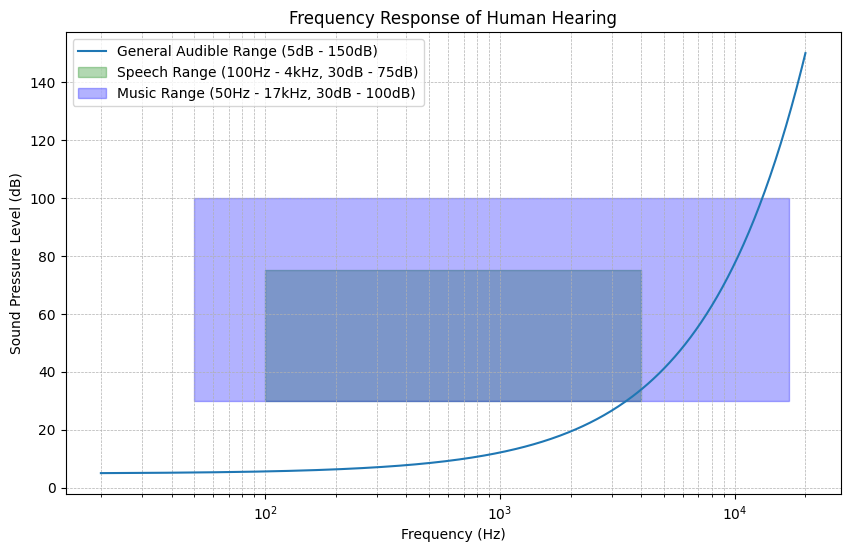

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle  # Ensure this import is included
import numpy as np
from IPython.display import display, Markdown

markdown_text = """
### Human Auditory Signal Processing

- Our auditory system performs a **frequency analysis** of the incoming sound waves.
- The **tonotopic organization** of the basilar membrane decomposes the sound signal into its constituent frequency components.
- This process is very reminiscent of what the **Fourier Series** does, right?
  - However, the Fourier Series typically represents periodic functions.
- But are all the sounds we hear periodic like the ones the Fourier Series is representing?
  - Not really....

**Conclusion**: While our auditory pathway conceptually mirrors mathematical tools like the Fourier Series, real-world sounds often exhibit non-periodic characteristics, which are still effectively analyzed by our auditory system.
"""
display(Markdown(markdown_text))

def plot_frequency_response():
    # Frequencies in Hz (log scale for better visualization)
    frequencies = np.logspace(np.log10(20), np.log10(20000), 400)
    
    # Simulate some normalized pressure levels
    pressures = np.interp(frequencies, [20, 20000], [5, 150])  # Simulated pressure level curve

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.semilogx(frequencies, pressures, label='General Audible Range (5dB - 150dB)')
    ax.add_patch(Rectangle((100, 30), 3900, 45, color='green', alpha=0.3, label='Speech Range (100Hz - 4kHz, 30dB - 75dB)'))
    ax.add_patch(Rectangle((50, 30), 16950, 70, color='blue', alpha=0.3, label='Music Range (50Hz - 17kHz, 30dB - 100dB)'))

    # Labels & Title
    ax.set_title('Frequency Response of Human Hearing')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Sound Pressure Level (dB)')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.legend()

    plt.show()

plot_frequency_response()

# THE FOURIER TRANSFORM

So far we have discussed many ways to represent a periodic wave function with both trigonometric and exponential terms. 
Here is some review

## The trignometric form of the  Fourier series:

$$
f(x) = a_0 + \sum_{n=1}^{\infty} \left( a_n \cos(nx) + b_n \sin(nx) \right)
$$

where

$$
a_0 = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(x) \, dx,
$$

$$
a_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \cos(nx) \, dx \quad \text{for } n \geq 1,
$$

$$
b_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \sin(nx) \, dx \quad \text{for } n \geq 1.
$$

## The exponential form of the Fourier series:

$$
f(x) = \sum_{n=-\infty}^{\infty} c_n e^{inx}
$$

where the Fourier coefficients $c_n$ are given by:

$$
c_n = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(x) e^{-inx} \, dx
$$

### The Fourier Transform: Extending the Fourier Series to Aperiodic Signals

The Fourier Transform is a mathematical technique that extends the utility of the Fourier Series to cover aperiodic signals.

- The **base assumption** for representing a signal by a sum of sinusoids (Fourier Series) is that the overall signal is periodic, just as each constituting sinusoid is.
- However, what if the **period of the signal** is not clear or it visibly doesn't seem periodic at all?

#### How do we approach this?

- **Question**: What is the period of the signal $ x(t) $?
  - **Observation**: We don’t know. It doesn’t seem periodic.
  - **Solution**: Let’s **pretend** the signal is periodic, and **believe** it. 😊

#### Assumption for Analysis:
We postulate: **The signal is periodic**, BUT we are only seeing **ONE period** because the $ T_0 $ is infinite.

Don't believe it? Here is why we consider it this way:
The Fourier Transform allows us to treat any signal as if it were periodic by assuming an infinite period, effectively smoothing out any discontinuities and letting us analyze the signal in terms of its frequency components over this hypothetical single, infinite period.

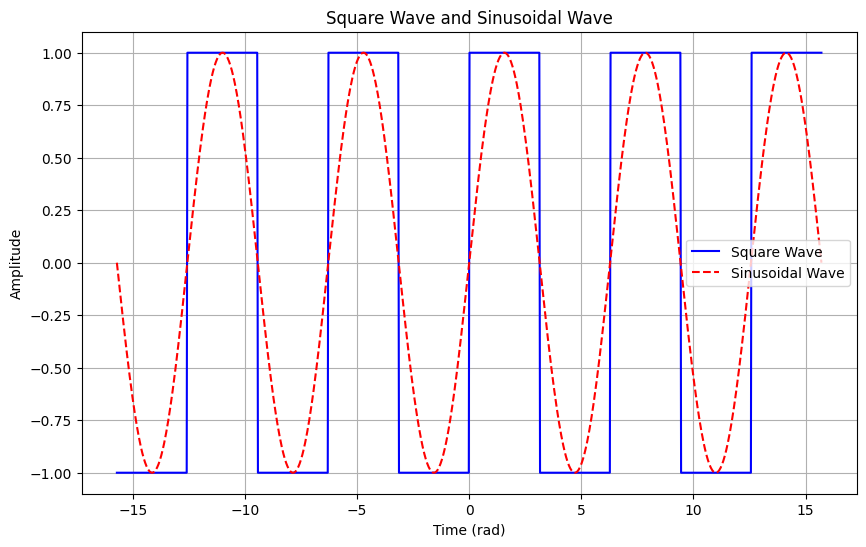

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time variable
t = np.linspace(-5*np.pi, 5 * np.pi, 1000)

# Define the square wave using the sign function
square_wave = np.sign(np.sin(t))

# Define the sinusoidal wave
sin_wave = np.sin(t)

# Plot both waves
plt.figure(figsize=(10, 6))
plt.plot(t, square_wave, label='Square Wave', color='blue')
plt.plot(t, sin_wave, label='Sinusoidal Wave', color='red', linestyle='--')

# Add title and labels
plt.title('Square Wave and Sinusoidal Wave')
plt.xlabel('Time (rad)')
plt.ylabel('Amplitude')

# Add legend
plt.legend()

# Show the grid
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, Markdown

# Define square wave and Fourier Transform
def square_wave(x, period):
    return np.where((x % period) < period / 2, 1, -1)

def fourier_transform(x, func):
    ft = np.fft.fftshift(np.fft.fft(func))
    freqs = np.fft.fftshift(np.fft.fftfreq(len(func), d=(x[1] - x[0])))
    return freqs, np.abs(ft)

# Update the plot based on chosen mode and period
def update_plot(period, mode):
    x = np.linspace(0, 800, 4000)  # Fixed range to limit wave instances
    fig, ax = plt.subplots(1, 1, figsize=(10, 4))
    
    if mode == 'Wave':
        y = square_wave(x, period)
        ax.plot(x, y, label='Square Wave')
        ax.set_title('Square Wave')
        ax.set_xlabel('Time or Space')
        ax.set_ylabel('[REDACTED]')
    elif mode == 'FT':
        wave = square_wave(x, period)
        freqs, ft = fourier_transform(x, wave)
        ax.plot(freqs, ft, label='Fourier Transform')
        ax.set_xlim(-1, 1)
        ax.set_title('Fourier Transform')
        ax.set_xlabel('Frequency')
        ax.set_ylabel('[REDACTED]')

    ax.legend()
    plt.show()

# Widgets for interaction
period_slider = widgets.FloatSlider(value=2 * np.pi, min=2.0, max=800.0, step=0.1, description='Period:')
mode_selector = widgets.RadioButtons(options=['Wave', 'FT'], description='Display:')
ui = widgets.VBox([widgets.HBox([period_slider, mode_selector]), widgets.interactive_output(update_plot, {'period': period_slider, 'mode': mode_selector})])
display(ui)

# Markdown explanation integrating given content on periodic and aperiodic signals
markdown_explanation = """
**Try setting a period of 800!** This value shows interesting behavior in the Fourier Transform in particular. This is effectively infinity for this demo. 

### Exploring Periodicity and Aperiodicity in Signal Processing

- **Construction of a Repeated Signal**
  - Construct a new signal $ x_{T_0}(t) $ by repeating $ x(t) $ at intervals of $ T_0 $.
  - Stretch $ T_0 $.
  - Stretch $ T_0 $ further, potentially till infinity.
  - At the limit, $ \lim_{{T_0 \to \infty}} x_{T_0}(t) = x(t) $, we observe that the seemingly aperiodic signal is periodic with $ T_0 = \infty $.

#### Normal Views vs Engineering/Mathematics Views
- **Normal Perspective**: The signal is NOT periodic.
- **Engineers/Mathematicians**: The signal is periodic with $ T_0 = \infty $.
"""

display(Markdown(markdown_explanation))

<>:46: SyntaxWarning: invalid escape sequence '\l'
<>:46: SyntaxWarning: invalid escape sequence '\l'
C:\Users\elbak\AppData\Local\Temp\ipykernel_7160\283201260.py:46: SyntaxWarning: invalid escape sequence '\l'
  markdown_explanation = """



**Try setting a period of 800!** This value shows interesting behavior in the Fourier Transform in particular.

### Exploring Periodicity and Aperiodicity in Signal Processing

- **Construction of a Repeated Signal**
  - Construct a new signal $ x_{T_0}(t) $ by repeating $ x(t) $ at intervals of $ T_0 $.
  - Stretch $ T_0 $.
  - Stretch $ T_0 $ further, potentially till infinity.
  - At the limit, $ \lim_{{T_0 	o \infty}} x_{T_0}(t) = x(t) $, we observe that the seemingly aperiodic signal is periodic with $ T_0 = \infty $.

#### Normal Views vs Engineering/Mathematics Views
- **Normal Perspective**: The signal is NOT periodic.
- **Engineers/Mathematicians**: The signal is periodic with $ T_0 = \infty $.


### Fourier Transform for Aperiodic Signals

So, the seemingly aperiodic signal $x(t)$ is periodic, only its period $T_0 = \infty$.

- With this assumption, the signal $x(t)$ is periodic in a mathematical sense.
- And the Fourier series representing $x_{T_0}(t)$ will also represent $x(t)$ in the limit $T_0 \rightarrow \infty$.

This can be formally expressed as:
$$\lim_{{T_0 \to \infty}} x_{T_0}(t) = x(t)$$

The expansion of $x(t)$ in this series is given by:
$$
x(t) = \sum_{k=-\infty}^{\infty} D_k e^{j \omega_k t}
$$
$$
D_k = \frac{1}{T_0} \int_{-\frac{T_0}{2}}^{\frac{T_0}{2}} x(t) e^{-j \omega_k t} dt
$$

#### Extending Period to Infinity

In the special case as $T_0 \rightarrow \infty$:
$$
x(t) = \sum_{k=-\infty}^{\infty} D_k e^{j \omega_k t}, \quad D_k = \frac{1}{T_0} \int_{-\frac{T_0}{2}}^{\frac{T_0}{2}} x(t) e^{-j \omega_k t} dt
$$

When $T_0 \rightarrow \infty$, the relationship between the terms simplifies,

$$
\frac{1}{T_0} = \frac{\omega_0}{2\pi} \rightarrow \text{as } T_0 \rightarrow \infty
$$
$\omega_0$ will become infinitesimally small. This,

$$
\lim_{{T_0 \to \infty}} \frac{1}{T_0} \approx \Delta \omega_0 \frac{2\pi}
$$

Rewrite $D_k$ as:
$$
D_k = \frac{\Delta \omega_0}{2\pi} \int_{-\infty}^{\infty} x(t) e^{-j \omega_k t} dt
$$

As $T_0 \rightarrow \infty$, $\omega_0$ will become infinitesimally small, and as $\Delta \omega_0$ approaches 0, then $D_k$ should theoretically become 0 too.


Thus,
$$
x(t) = \sum_{k=-\infty}^{\infty} \frac{\Delta \omega_0}{2\pi} \left(\int_{-\infty}^\infty x(t) e^{-j \omega_k t} dt\right) e^{j \omega_k t}
$$

#### Implication as $T_0 \rightarrow \infty$


However, the critical inspection reveals that rather than becoming zero, the normalized scaling of $D_k$ with respect to the widening period maintains the integrity of the transformed signal's representation through the continuous integration over an infinite domain.

This careful consideration allows us to wrap the concept back into a time-domain Fourier series representation of $x(t)$. Thus reinforcing the functional integrity of the Fourier Transform to analyse even non-periodic signals like stepping between discrete and continuous interpretations seamlessly.

### Transition from Discrete to Continuous Fourier Transform

As we extend the period $ T_0 $ to infinity ($ T_0 \rightarrow \infty $), and $ \Delta \omega_0 $ approaches 0, the coefficients $ D_k $ are redefined. We transform our discrete analysis into a continuous framework to handle infinite or non-periodic signals.

#### Rewriting $ D_k $
In the limit as $ T_0 \rightarrow \infty $, $ \Delta \omega_0 $ which represents the difference in angular frequency between successive terms, approaches zero. Thus, the coefficients can be rewritten as:
$$
D_k = \frac{\Delta \omega_0}{2\pi} \int_{-\infty}^\infty x(t) e^{-j\omega_k t} dt
$$
Substituting into the Fourier series:
$$
x(t) = \sum_{k=-\infty}^\infty \frac{\Delta \omega_0}{2\pi} \left(\int_{-\infty}^\infty x(t) e^{-j\omega_k t} dt\right) e^{j\omega_k t}
$$

### Continuous Frequency Spectrum

To bridge from a discrete to a continuous frequency spectrum, consider the following changes:
- Replace $ \Delta \omega_0 $ with $ d\omega $ indicating a differential element.
- Change $ \omega_k $ to $ \omega $ to represent a continuous frequency variable.
- Change the summation to an integral, representing continuous superposition over all frequencies.

Thus, the expression for $ x(t) $ using the continuous Fourier Transform becomes:
$$
x(t) = \frac{1}{2\pi} \int_{-\infty}^\infty \left( \int_{-\infty}^\infty x(t) e^{-j\omega t} dt \right) e^{j\omega t} d\omega
$$
Where $ X(\omega) $, the Fourier Transform of $ x(t) $, is defined as:
$$
X(\omega) = \int_{-\infty}^\infty x(t) e^{-j\omega t} dt
$$
And thus:
$$
x(t) = \frac{1}{2\pi} \int_{-\infty}^\infty X(\omega) e^{j\omega t} d\omega
$$

### Conclusion
This transition from discrete series to the continuous Fourier Transform allows us to analyze signals that are non-periodic or whose periods are essentially infinite, wrapping the classical Fourier series into a more general and widely applicable tool - the Fourier Transform.